In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [306]:
df = pd.read_csv("/content/drive/MyDrive/titanic-dataset/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [307]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [309]:
print("Survival rate : ", df['Survived'].mean())
df['Survived'].value_counts()

Survival rate :  0.3838383838383838


,count
Survived,
0,549
1,342


In [310]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [311]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S


In [312]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [313]:
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [314]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


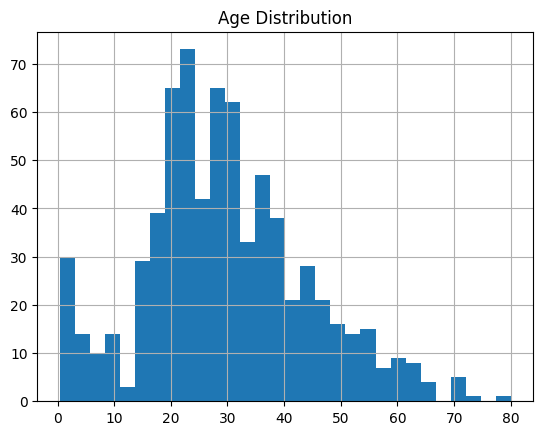

In [315]:
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.show()

In [316]:
print("Cabin data by class:")
df.groupby('Pclass')['Cabin'].count()

Cabin data by class:


,Cabin
Pclass,
1,176
2,16
3,12


In [317]:
cabin_by_class = df.groupby('Pclass')['Cabin'].count() / df.groupby('Pclass').size()
print(cabin_by_class)

Pclass
1    0.814815
2    0.086957
3    0.024440
dtype: float64


In [318]:
df.groupby('Pclass').size()

,0
Pclass,
1,216
2,184
3,491


In [319]:
df['Has_Cabin'] = df['Cabin'].notna().astype(int)


# See how this correlates with survival
df.groupby('Has_Cabin')['Survived'].mean()

,Survived
Has_Cabin,
0,0.299854
1,0.666667


In [320]:
print("Embarked port distribution:")
df['Embarked'].value_counts()
df.groupby('Embarked')['Survived'].mean()

Embarked port distribution:


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [321]:
print("\nFamily size patterns:")
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1  # +1 for the person themselves
df.groupby('Family_Size')['Survived'].mean()


Family size patterns:


,Survived
Family_Size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


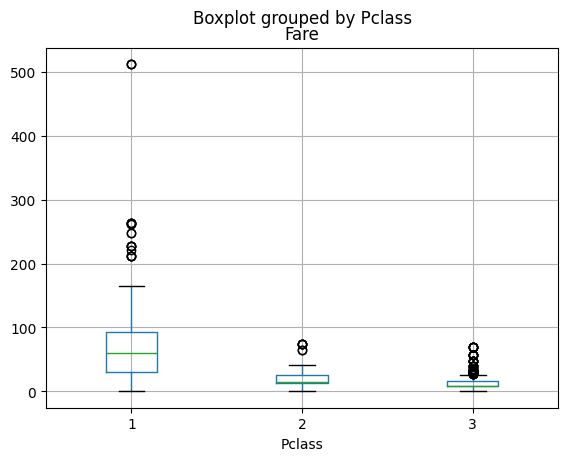

In [322]:
# Quick peek at fare distribution by class
df.boxplot(column='Fare', by='Pclass')
plt.show()

In [323]:
# Extract titles from names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


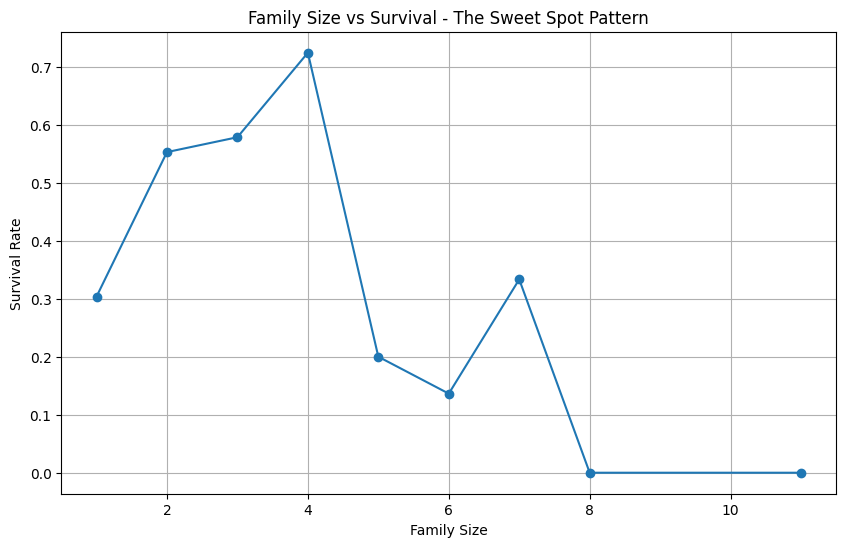

In [324]:
# Let's visualize what you spotted
plt.figure(figsize=(10,6))
family_survival = df.groupby('Family_Size')['Survived'].mean()
plt.plot(family_survival.index, family_survival.values, 'o-')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Family Size vs Survival - The Sweet Spot Pattern')
plt.grid(True)
plt.show()

In [325]:
print("Missing values again:")
df.isnull().sum()

Missing values again:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [326]:
print("\nAge by title (remember we extracted titles?):")
df.groupby('Title')['Age'].median()


Age by title (remember we extracted titles?):


,Age
Title,
Capt,70.0
Col,58.0
Countess,33.0
Don,40.0
Dr,46.5
Jonkheer,38.0
Lady,48.0
Major,48.5
Master,3.5


In [327]:
print("Current columns and types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Current columns and types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Has_Cabin        int64
Family_Size      int64
Title           object
dtype: object

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Has_Cabin        0
Family_Size      0
Title            0
dtype: int64


In [328]:
title_age_medians = df.groupby('Title')['Age'].median()
print("Age medians by title:")
print(title_age_medians)

Age medians by title:
Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64


In [329]:
print("Missing ages:", df['Age'].isna().sum())
print("Age range:", df['Age'].min(), "to", df['Age'].max())

Missing ages: 177
Age range: 0.42 to 80.0


In [330]:
title_age_medians = df.groupby('Title')['Age'].median()
print("\nTitle age medians:")
print(title_age_medians)


Title age medians:
Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64


In [331]:
df[df['Title'] == 'Capt']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Family_Size,Title
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,1,3,Capt


In [332]:
title_age_medians = df.groupby('Title')['Age'].median()
print("\nTitle age medians:")
print(title_age_medians)


Title age medians:
Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64


In [333]:
# First, let's see what we're mapping FROM and TO
print("Title age medians (our lookup table):")
print(title_age_medians)
print("\nType:", type(title_age_medians))

Title age medians (our lookup table):
Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64

Type: <class 'pandas.core.series.Series'>


In [334]:
# Let's see what titles the missing-age people have
mask = df['Age'].isna()
missing_age_people = df.loc[mask, 'Title']
print(f"\nTitles of people with missing ages:")
print(missing_age_people.head())


Titles of people with missing ages:
5       Mr
17      Mr
19     Mrs
26      Mr
28    Miss
Name: Title, dtype: object


In [335]:
mapped_ages = missing_age_people.map(title_age_medians)
print(f"\nThose titles mapped to ages:")
print(mapped_ages.head())


Those titles mapped to ages:
5     30.0
17    30.0
19    35.0
26    30.0
28    21.0
Name: Title, dtype: float64


In [336]:
title_age_medians

,Age
Title,
Capt,70.0
Col,58.0
Countess,33.0
Don,40.0
Dr,46.5
Jonkheer,38.0
Lady,48.0
Major,48.5
Master,3.5


In [337]:
print("What title_age_medians actually looks like:")
print(title_age_medians)
print(f"\nType: {type(title_age_medians)}")
print(f"Index (the keys): {title_age_medians.index.tolist()}")
print(f"Values (the ages): {title_age_medians.values.tolist()}")

What title_age_medians actually looks like:
Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64

Type: <class 'pandas.core.series.Series'>
Index (the keys): ['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir']
Values (the ages): [70.0, 58.0, 33.0, 40.0, 46.5, 38.0, 48.0, 48.5, 3.5, 21.0, 24.0, 24.0, 30.0, 35.0, 28.0, 46.5, 49.0]


In [338]:
df.loc[mask, 'Age'] = df.loc[mask, 'Title'].map(title_age_medians)

# Check  work
print("Missing ages after filling:", df['Age'].isna().sum())

Missing ages after filling: 0


In [339]:
print("Sex values:", df['Sex'].value_counts())

Sex values: Sex
male      577
female    314
Name: count, dtype: int64


In [340]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [341]:
print("\nAfter encoding:")
print(df['Sex'].value_counts())
print("Data type:", df['Sex'].dtype)


After encoding:
Sex
1    577
0    314
Name: count, dtype: int64
Data type: int64


In [342]:
df['Sex'].isna().sum()

np.int64(0)

In [343]:
print("Embarked values:")
print(df['Embarked'].value_counts())

Embarked values:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [344]:
 df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [345]:
print(f"\nMissing values: {df['Embarked'].isnull().sum()}")


Missing values: 2


In [346]:
missing_embarked = df[df['Embarked'].isnull()]
print(f"\nPassengers with missing Embarked:")
print(missing_embarked[['Name', 'Pclass', 'Fare', 'Embarked']])


Passengers with missing Embarked:
                                          Name  Pclass  Fare Embarked
61                         Icard, Miss. Amelie       1  80.0      NaN
829  Stone, Mrs. George Nelson (Martha Evelyn)       1  80.0      NaN


In [347]:
print("First class passengers by port:")
first_class = df[df['Pclass'] == 1]
print(first_class['Embarked'].value_counts())

First class passengers by port:
Embarked
S    127
C     85
Q      2
Name: count, dtype: int64


In [348]:
# What about that specific $80 fare?
print(f"\nPassengers who paid exactly $80:")
fare_80 = df[df['Fare'] == 80.0]
print(fare_80[['Name', 'Pclass', 'Embarked', 'Fare']])


Passengers who paid exactly $80:
                                          Name  Pclass Embarked  Fare
61                         Icard, Miss. Amelie       1      NaN  80.0
829  Stone, Mrs. George Nelson (Martha Evelyn)       1      NaN  80.0


In [349]:
print(f"\nFirst class fare statistics by port:")
first_class_fares = first_class.groupby('Embarked')['Fare'].describe()
first_class_fares


First class fare statistics by port:


,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,85.0,104.718529,99.093935,26.55,49.50,78.2667,110.8833,512.3292
Q,2.0,90.000000,0.000000,90.00,90.00,90.0000,90.0000,90.0000
S,127.0,70.364862,58.811278,0.00,29.25,52.0000,83.4750,263.0000


In [350]:
df['Embarked'].isnull().sum()

np.int64(2)

In [351]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = 'C'

In [352]:
print("Missing Embarked after filling:", df['Embarked'].isnull().sum())
print("\nNew distribution:")
print(df['Embarked'].value_counts())

Missing Embarked after filling: 0

New distribution:
Embarked
S    644
C    170
Q     77
Name: count, dtype: int64


In [353]:
from sklearn.preprocessing import LabelEncoder
le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

In [354]:
print("\nAfter encoding:")
print(df['Embarked'].value_counts())
print("\nMapping:")
for i, port in enumerate(le_embarked.classes_):
    print(f"{port} → {i}")


After encoding:
Embarked
2    644
0    170
1     77
Name: count, dtype: int64

Mapping:
C → 0
Q → 1
S → 2


In [355]:
print("Cabin situation:")
print(f"Missing: {df['Cabin'].isnull().sum()}")
print(f"Total: {len(df)}")
print(f"Missing percentage: {df['Cabin'].isnull().sum()/len(df)*100:.1f}%")

Cabin situation:
Missing: 687
Total: 891
Missing percentage: 77.1%


In [356]:
print(f"\nSample cabin values:")
print(df[df['Cabin'].notna()]['Cabin'].head(10))


Sample cabin values:
1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object


In [357]:
if 'Has_Cabin' in df.columns:
    print(f"\nHas_Cabin distribution:")
    print(df['Has_Cabin'].value_counts())
    print(f"\nSurvival by cabin status:")
    print(df.groupby('Has_Cabin')['Survived'].mean())


Has_Cabin distribution:
Has_Cabin
0    687
1    204
Name: count, dtype: int64

Survival by cabin status:
Has_Cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


In [358]:
print("Sample cabin values:")
cabin_samples = df[df['Cabin'].notna()]['Cabin'].head(20)
print(cabin_samples.tolist())

Sample cabin values:
['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'C23 C25 C27', 'E31', 'A5', 'D10 D12']


In [359]:
df['Deck'] = df['Cabin'].str[0]  # Get first character
print(f"\nDeck letters we found:")
print(df['Deck'].value_counts().sort_index())


Deck letters we found:
Deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: count, dtype: int64


In [360]:
# Now fill missing with 'S' for Steerage/Shared
df['Deck'] = df['Deck'].fillna('S')

In [361]:
df['Deck'].value_counts()

,count
Deck,
S,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [362]:
print(f"\nSurvival rate by deck:")
survival_by_deck = df.groupby('Deck')['Survived'].mean().sort_values(ascending=False)
print(survival_by_deck)


Survival rate by deck:
Deck
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
S    0.299854
T    0.000000
Name: Survived, dtype: float64


In [363]:
# Let's clean up our mess
print("Current columns with 'cabin' info:")
cabin_cols = [col for col in df.columns if 'cabin' in col.lower() or col == 'Deck']
print(cabin_cols)

Current columns with 'cabin' info:
['Cabin', 'Has_Cabin', 'Deck']


In [364]:
print("\nHas_Cabin survival:")
print(df.groupby('Has_Cabin')['Survived'].mean())


Has_Cabin survival:
Has_Cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


In [365]:
print("\nDeck survival (more detailed):")
print(df.groupby('Deck')['Survived'].mean().sort_values(ascending=False))


Deck survival (more detailed):
Deck
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
S    0.299854
T    0.000000
Name: Survived, dtype: float64


In [366]:
le_deck = LabelEncoder()
df['Deck'] = le_deck.fit_transform(df['Deck'])

print(f"\nDeck encoding:")
for i, deck in enumerate(le_deck.classes_):
    print(f"{deck} → {i}")


Deck encoding:
A → 0
B → 1
C → 2
D → 3
E → 4
F → 5
G → 6
S → 7
T → 8


In [367]:
print("Correlation check:")
print(f"Has_Cabin vs Deck correlation: {df['Has_Cabin'].corr(df['Deck']):.3f}")

Correlation check:
Has_Cabin vs Deck correlation: -0.938


In [368]:
deck_cabin_crosstab = pd.crosstab(df['Deck'], df['Has_Cabin'])
print(f"\nDeck vs Has_Cabin relationship:")
print(deck_cabin_crosstab)


Deck vs Has_Cabin relationship:
Has_Cabin    0   1
Deck              
0            0  15
1            0  47
2            0  59
3            0  33
4            0  32
5            0  13
6            0   4
7          687   0
8            0   1


In [369]:
df.drop('Cabin',axis=1 ,inplace=True)

In [370]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,Family_Size,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,0,2,Mr,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,1,2,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,0,1,Miss,7
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,1,2,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,0,1,Mr,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2,0,1,Rev,7
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2,1,1,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.0,1,2,W./C. 6607,23.4500,2,0,4,Miss,7
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0,1,1,Mr,2


In [371]:
print("Individual feature importance test:")
print("Has_Cabin survival rates:")
print(df.groupby('Has_Cabin')['Survived'].mean())

Individual feature importance test:
Has_Cabin survival rates:
Has_Cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


In [372]:
print("\nDeck survival rates (more granular):")
print(df.groupby('Deck')['Survived'].mean().sort_values(ascending=False))


Deck survival rates (more granular):
Deck
3    0.757576
4    0.750000
1    0.744681
5    0.615385
2    0.593220
6    0.500000
0    0.466667
7    0.299854
8    0.000000
Name: Survived, dtype: float64


In [373]:
df = df.drop('Name', axis=1)
print("Dropped Name column!")

Dropped Name column!


In [374]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
1601,7
CA. 2343,7
3101295,6
CA 2144,6
...,...
PC 17590,1
17463,1
330877,1


In [375]:
print("Sample tickets:")
print(df['Ticket'].head(20).tolist())

Sample tickets:
['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450', '330877', '17463', '349909', '347742', '237736', 'PP 9549', '113783', 'A/5. 2151', '347082', '350406', '248706', '382652', '244373', '345763', '2649']


In [376]:
df['Ticket_Length'] = df['Ticket'].astype(str).str.len()
df['Ticket_HasLetters'] = df['Ticket'].str.contains('[A-Za-z]').astype(int)
df['Ticket_IsNumeric'] = df['Ticket'].str.isnumeric().astype(int)

In [377]:
df['Ticket_Prefix'] = df['Ticket'].str.extract('([A-Za-z]+)').fillna('NONE')

print(f"\nTicket length distribution:")
print(df['Ticket_Length'].value_counts().head())

print(f"\nTicket prefix patterns:")
print(df['Ticket_Prefix'].value_counts().head(10))


Ticket length distribution:
Ticket_Length
6     419
5     131
4     101
8      76
10     41
Name: count, dtype: int64

Ticket prefix patterns:
Ticket_Prefix
NONE     661
PC        60
C         33
A         29
STON      18
SOTON     17
CA        14
S         14
SC        13
W         11
Name: count, dtype: int64


In [378]:
print("Survival by ticket length:")
survival_by_length = df.groupby('Ticket_Length')['Survived'].agg(['mean', 'count']).round(3)
print(survival_by_length)

print("\nSurvival by ticket type:")
print("Has letters:", df.groupby('Ticket_HasLetters')['Survived'].mean())
print("Is numeric:", df.groupby('Ticket_IsNumeric')['Survived'].mean())

Survival by ticket length:
                mean  count
Ticket_Length              
3              0.000      2
4              0.366    101
5              0.618    131
6              0.320    419
7              0.296     27
8              0.539     76
9              0.192     26
10             0.341     41
11             0.250      8
12             0.400     10
13             0.400     10
15             0.333      9
16             0.273     11
17             0.429     14
18             0.000      6

Survival by ticket type:
Has letters: Ticket_HasLetters
0    0.384266
1    0.382609
Name: Survived, dtype: float64
Is numeric: Ticket_IsNumeric
0    0.382609
1    0.384266
Name: Survived, dtype: float64


In [379]:
print("\nSurvival by ticket prefix (top patterns):")
prefix_survival = df.groupby('Ticket_Prefix')['Survived'].agg(['mean', 'count']).round(3)
# Only show prefixes with at least 10 passengers
prefix_survival = prefix_survival[prefix_survival['count'] >= 10]
print(prefix_survival.sort_values('mean', ascending=False))


Survival by ticket prefix (top patterns):
                mean  count
Ticket_Prefix              
PC             0.650     60
SC             0.538     13
C              0.455     33
STON           0.444     18
NONE           0.384    661
S              0.143     14
SOTON          0.118     17
W              0.091     11
CA             0.071     14
A              0.069     29


In [380]:
# Quick correlation check
print(f"\nCorrelations with survival:")
ticket_features = ['Ticket_Length', 'Ticket_HasLetters', 'Ticket_IsNumeric']
for feature in ticket_features:
    corr = df[feature].corr(df['Survived'])
    print(f"{feature}: {corr:.3f}")


Correlations with survival:
Ticket_Length: -0.055
Ticket_HasLetters: -0.001
Ticket_IsNumeric: 0.001


In [381]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [382]:
# Keep only prefixes with enough data and clear patterns
significant_prefixes = ['PC', 'SC', 'C', 'A', 'CA', 'STON', 'S', 'SOTON', 'W']

# Create binary features for the most impactful ones
df['Ticket_PC'] = (df['Ticket_Prefix'] == 'PC').astype(int)  # High survival
df['Ticket_A'] = (df['Ticket_Prefix'] == 'A').astype(int)    # Low survival
df['Ticket_CA'] = (df['Ticket_Prefix'] == 'CA').astype(int)  # Very low survival

print("Validation:")
print("PC passengers survival:", df[df['Ticket_PC']==1]['Survived'].mean())
print("A passengers survival:", df[df['Ticket_A']==1]['Survived'].mean())

Validation:
PC passengers survival: 0.65
A passengers survival: 0.06896551724137931


In [383]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Family_Size,Title,Deck,Ticket_Length,Ticket_HasLetters,Ticket_IsNumeric,Ticket_Prefix,Ticket_PC,Ticket_A,Ticket_CA
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2,...,2,Mr,7,9,1,0,A,0,1,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,...,2,Mrs,2,8,1,0,PC,1,0,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2,...,1,Miss,7,16,1,0,STON,0,0,0
3,4,1,1,0,35.0,1,0,113803,53.1000,2,...,2,Mrs,2,6,0,1,NONE,0,0,0
4,5,0,3,1,35.0,0,0,373450,8.0500,2,...,1,Mr,7,6,0,1,NONE,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,2,...,1,Rev,7,6,0,1,NONE,0,0,0
887,888,1,1,0,19.0,0,0,112053,30.0000,2,...,1,Miss,1,6,0,1,NONE,0,0,0
888,889,0,3,0,21.0,1,2,W./C. 6607,23.4500,2,...,4,Miss,7,10,1,0,W,0,0,0
889,890,1,1,1,26.0,0,0,111369,30.0000,0,...,1,Mr,2,6,0,1,NONE,0,0,0


In [384]:
# We extracted all the gold, now drop the messy original
df = df.drop('Ticket', axis=1)

In [385]:
print("Title distribution:")
print(df['Title'].value_counts())

Title distribution:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [386]:
from sklearn.preprocessing import LabelEncoder

le_title = LabelEncoder()
df['Title'] = le_title.fit_transform(df['Title'])

print("Title encoding:")
for i, title in enumerate(le_title.classes_):
    print(f"{title} → {i}")


Title encoding:
Capt → 0
Col → 1
Countess → 2
Don → 3
Dr → 4
Jonkheer → 5
Lady → 6
Major → 7
Master → 8
Miss → 9
Mlle → 10
Mme → 11
Mr → 12
Mrs → 13
Ms → 14
Rev → 15
Sir → 16


In [387]:
# Encode the prefix column too
le_prefix = LabelEncoder()
df['Ticket_Prefix'] = le_prefix.fit_transform(df['Ticket_Prefix'])

In [388]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Family_Size,Title,Deck,Ticket_Length,Ticket_HasLetters,Ticket_IsNumeric,Ticket_Prefix,Ticket_PC,Ticket_A,Ticket_CA
0,1,0,3,1,22.0,1,0,7.2500,2,0,2,12,7,9,1,0,0,0,1,0
1,2,1,1,0,38.0,1,0,71.2833,0,1,2,13,2,8,1,0,8,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,2,0,1,9,7,16,1,0,15,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,2,1,2,13,2,6,0,1,6,0,0,0
4,5,0,3,1,35.0,0,0,8.0500,2,0,1,12,7,6,0,1,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2,0,1,15,7,6,0,1,6,0,0,0
887,888,1,1,0,19.0,0,0,30.0000,2,1,1,9,1,6,0,1,6,0,0,0
888,889,0,3,0,21.0,1,2,23.4500,2,0,4,9,7,10,1,0,17,0,0,0
889,890,1,1,1,26.0,0,0,30.0000,0,1,1,12,2,6,0,1,6,0,0,0


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Sex                891 non-null    int64  
 4   Age                891 non-null    float64
 5   SibSp              891 non-null    int64  
 6   Parch              891 non-null    int64  
 7   Fare               891 non-null    float64
 8   Embarked           891 non-null    int64  
 9   Has_Cabin          891 non-null    int64  
 10  Family_Size        891 non-null    int64  
 11  Title              891 non-null    int64  
 12  Deck               891 non-null    int64  
 13  Ticket_Length      891 non-null    int64  
 14  Ticket_HasLetters  891 non-null    int64  
 15  Ticket_IsNumeric   891 non-null    int64  
 16  Ticket_Prefix      891 non

In [390]:
# Let's prepare for modeling
print("Final feature set:")
features = df.columns.tolist()
features.remove('Survived')  # Our target
features.remove('PassengerId')  # Not useful for prediction

print(f"Features for modeling: {len(features)}")
print(features)

# Ready to split and train!
X = df[features]
y = df['Survived']

Final feature set:
Features for modeling: 18
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'Family_Size', 'Title', 'Deck', 'Ticket_Length', 'Ticket_HasLetters', 'Ticket_IsNumeric', 'Ticket_Prefix', 'Ticket_PC', 'Ticket_A', 'Ticket_CA']


In [391]:
# Import all the models and evaluation tools
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [392]:
try:
    from xgboost import XGBClassifier
    has_xgb = True
except ImportError:
    print("XGBoost not available - install with: !pip install xgboost")
    has_xgb = False

In [393]:
print(f"Tournament starting with {len(features)} features!")
print(f"Features: {features}")

Tournament starting with 18 features!
Features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'Family_Size', 'Title', 'Deck', 'Ticket_Length', 'Ticket_HasLetters', 'Ticket_IsNumeric', 'Ticket_Prefix', 'Ticket_PC', 'Ticket_A', 'Ticket_CA']


In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


models_dict = {
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

In [395]:
models_dict['XGBoost'] = XGBClassifier(random_state=42, eval_metric='logloss')

In [396]:
print(f"\n🥊 FIGHTERS READY: {list(models_dict.keys())}")


🥊 FIGHTERS READY: ['RandomForest', 'LogisticRegression', 'GradientBoosting', 'SVM', 'XGBoost']


In [397]:
print("Overall survival rate:", y.mean())
print("Train survival rate:", y_train.mean())
print("Test survival rate:", y_test.mean())
# All should be ~0.38!

Overall survival rate: 0.3838383838383838
Train survival rate: 0.38342696629213485
Test survival rate: 0.3854748603351955


In [398]:
# Cross-validation tournament setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

print("🔥 MODEL TOURNAMENT STARTING! 🔥")
print("=" * 50)

# Run the tournament
for name, model in models_dict.items():
    print(f"\n🏃‍♂️ Training {name}...")

    # 5-fold cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Store results
    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'cv_scores': cv_scores
    }

    print(f"   ✅ CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"   📊 Individual folds: {cv_scores}")

# 🏆 TOURNAMENT RESULTS
print("\n" + "=" * 50)
print("🏆 FINAL LEADERBOARD 🏆")
print("=" * 50)

# Sort by performance
sorted_results = sorted(results.items(), key=lambda x: x[1]['cv_mean'], reverse=True)

for i, (name, scores) in enumerate(sorted_results, 1):
    print(f"{i}. {name:15} | {scores['cv_mean']:.4f} ± {scores['cv_std']:.4f}")

🔥 MODEL TOURNAMENT STARTING! 🔥

🏃‍♂️ Training RandomForest...
   ✅ CV Accuracy: 0.8203 (+/- 0.0280)
   📊 Individual folds: [0.81118881 0.8041958  0.82394366 0.81690141 0.84507042]

🏃‍♂️ Training LogisticRegression...
   ✅ CV Accuracy: 0.8090 (+/- 0.0536)
   📊 Individual folds: [0.79020979 0.79020979 0.83802817 0.78169014 0.84507042]

🏃‍♂️ Training GradientBoosting...
   ✅ CV Accuracy: 0.8175 (+/- 0.0367)
   📊 Individual folds: [0.81818182 0.78321678 0.83802817 0.82394366 0.82394366]

🏃‍♂️ Training SVM...
   ✅ CV Accuracy: 0.6882 (+/- 0.0316)
   📊 Individual folds: [0.68531469 0.67132867 0.68309859 0.71830986 0.68309859]

🏃‍♂️ Training XGBoost...
   ✅ CV Accuracy: 0.8174 (+/- 0.0252)
   📊 Individual folds: [0.82517483 0.81118881 0.83802817 0.8028169  0.80985915]

🏆 FINAL LEADERBOARD 🏆
1. RandomForest    | 0.8203 ± 0.0140
2. GradientBoosting | 0.8175 ± 0.0183
3. XGBoost         | 0.8174 ± 0.0126
4. LogisticRegression | 0.8090 ± 0.0268
5. SVM             | 0.6882 ± 0.0158


In [399]:
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [400]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=False)

In [401]:
feature_importance

,feature,importance
2,Age,0.180949
1,Sex,0.171911
5,Fare,0.171567
9,Title,0.114391
10,Deck,0.060712
11,Ticket_Length,0.053555
0,Pclass,0.049161
8,Family_Size,0.045112
3,SibSp,0.032027
7,Has_Cabin,0.031693


In [402]:
print("🎯 TOP FEATURES DRIVING SUCCESS:")
print(feature_importance.head(10))

🎯 TOP FEATURES DRIVING SUCCESS:
          feature  importance
2             Age    0.180949
1             Sex    0.171911
5            Fare    0.171567
9           Title    0.114391
10           Deck    0.060712
11  Ticket_Length    0.053555
0          Pclass    0.049161
8     Family_Size    0.045112
3           SibSp    0.032027
7       Has_Cabin    0.031693


In [403]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

print("🔥 BUILDING THE ENSEMBLE ARMY! 🔥")

🔥 BUILDING THE ENSEMBLE ARMY! 🔥


In [404]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
        ('lr', LogisticRegression(random_state=42, max_iter=1000)),
        ('xgb', XGBClassifier())
    ],
    voting='hard'
)


ensemble.fit(X_train, y_train)

# Predict (automatically handles the voting)
final_predictions = ensemble.predict(X_test)

In [405]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 🎯 Your TUNED RandomForest with winning parameters
tuned_rf = RandomForestClassifier(
    bootstrap=True,
    criterion='gini',
    max_depth=7,
    max_features=3,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42  # Always add this for reproducibility
)

# 🚀 Build the ensemble army with your champion RF
ensemble = VotingClassifier(
    estimators=[
        ('tuned_rf', tuned_rf),                           # Your optimized beast
        ('lr', LogisticRegression(random_state=42)),      # Simple but effective
        ('svc', SVC(probability=True, random_state=42)),  # Support Vector Machine
        ('xgb', XGBClassifier(random_state=42))          # XGBoost power
    ],
    voting='soft'  # Use probabilities (usually better than hard voting)
)

print("🔥 ENSEMBLE ARMY ASSEMBLED! 🔥")
print("Soldiers:")
print("- Tuned RandomForest (your champion)")
print("- Logistic Regression (the reliable one)")
print("- Support Vector Machine (the separator)")
print("- XGBoost (the gradient booster)")

🔥 ENSEMBLE ARMY ASSEMBLED! 🔥
Soldiers:
- Tuned RandomForest (your champion)
- Logistic Regression (the reliable one)
- Support Vector Machine (the separator)
- XGBoost (the gradient booster)


In [406]:
ensemble.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('tuned_rf',
                              RandomForestClassifier(max_depth=7,
                                                     max_features=3,
                                                     min_samples_split=5,
                                                     random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [407]:
# 🚀 Check the ensemble score
ensemble_score = ensemble.score(X_test, y_test)
print(f"🏆 ENSEMBLE SCORE: {ensemble_score:.4f}")

# 📊 Compare to your previous best
previous_best = 0.7709
improvement = ensemble_score - previous_best

print(f"📈 PREVIOUS BEST (Tuned RF): {previous_best:.4f}")
print(f"🔥 ENSEMBLE IMPROVEMENT: {improvement:+.4f}")

if improvement > 0:
    print(f"🎉 ENSEMBLE WINS! {improvement*100:.2f}% boost!")
else:
    print(f"😅 Single model was better by {abs(improvement)*100:.2f}%")

🏆 ENSEMBLE SCORE: 0.7933
📈 PREVIOUS BEST (Tuned RF): 0.7709
🔥 ENSEMBLE IMPROVEMENT: +0.0224
🎉 ENSEMBLE WINS! 2.24% boost!


In [408]:
# See how each soldier performed individually
individual_scores = {}

for name, model in ensemble.named_estimators_.items():
    score = model.score(X_test, y_test)
    individual_scores[name] = score
    print(f"{name}: {score:.4f}")

print(f"\n🏆 Best individual: {max(individual_scores.values()):.4f}")
print(f"🤝 Ensemble: {ensemble_score:.4f}")

tuned_rf: 0.7709
lr: 0.7654
svc: 0.6536
xgb: 0.7877

🏆 Best individual: 0.7877
🤝 Ensemble: 0.7933


In [409]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier

# 🔥 THE ULTIMATE ENSEMBLE ARMY
ultimate_ensemble = VotingClassifier(
    estimators=[
        ('tuned_rf', tuned_rf),                                    # Your champion
        ('xgb', XGBClassifier(random_state=42)),                  # The surprise winner
        ('ada', AdaBoostClassifier(random_state=42)),             # Boosting power
        ('gb', GradientBoostingClassifier(random_state=42)),      # Sequential learning
        ('et', ExtraTreesClassifier(random_state=42)),            # Extra randomness
        ('bag', BaggingClassifier(random_state=42)),              # Bootstrap aggregating
        ('lr', LogisticRegression(random_state=42))               # Simple baseline
    ],
    voting='soft'  # Use probabilities
)

print("🚀 ULTIMATE ENSEMBLE: 7 MODELS STRONG!")

🚀 ULTIMATE ENSEMBLE: 7 MODELS STRONG!


In [410]:
import time

print("🚀 TRAINING 7-MODEL ULTIMATE ENSEMBLE...")
print("Models: Tuned RF + XGBoost + AdaBoost + GradientBoost + ExtraTrees + Bagging + LogisticRegression")

# Track training time
start_time = time.time()

# Train the ultimate ensemble
ultimate_ensemble.fit(X_train, y_train)

end_time = time.time()
print(f"⏰ Training completed in {(end_time - start_time):.1f} seconds")

# 🎯 THE MOMENT OF TRUTH
ultimate_score = ultimate_ensemble.score(X_test, y_test)

print(f"\n🏆 ULTIMATE ENSEMBLE SCORE: {ultimate_score:.4f}")

# 📊 Compare to your previous bests
previous_best = 0.7933  # Your 4-model ensemble
single_xgb = 0.7877     # Your best individual model

improvement_vs_ensemble = ultimate_score - previous_best
improvement_vs_single = ultimate_score - single_xgb

print(f"📈 PREVIOUS 4-MODEL ENSEMBLE: {previous_best:.4f}")
print(f"🔥 ULTIMATE 7-MODEL IMPROVEMENT: {improvement_vs_ensemble:+.4f} ({improvement_vs_ensemble*100:+.2f}%)")

if ultimate_score >= 0.80:
    print("🎉🎉🎉 BROKE THE 80% BARRIER! 🎉🎉🎉")
elif ultimate_score > previous_best:
    print("📈 NEW PERSONAL BEST!")
else:
    print("🤔 Hmm, sometimes more models ≠ better performance")

# 🔍 Check individual model performance
print(f"\n🥊 INDIVIDUAL MODEL SCORES:")
for name, model in ultimate_ensemble.named_estimators_.items():
    score = model.score(X_test, y_test)
    print(f"  {name}: {score:.4f}")

🚀 TRAINING 7-MODEL ULTIMATE ENSEMBLE...
Models: Tuned RF + XGBoost + AdaBoost + GradientBoost + ExtraTrees + Bagging + LogisticRegression
⏰ Training completed in 0.6 seconds

🏆 ULTIMATE ENSEMBLE SCORE: 0.8156
📈 PREVIOUS 4-MODEL ENSEMBLE: 0.7933
🔥 ULTIMATE 7-MODEL IMPROVEMENT: +0.0223 (+2.23%)
🎉🎉🎉 BROKE THE 80% BARRIER! 🎉🎉🎉

🥊 INDIVIDUAL MODEL SCORES:
  tuned_rf: 0.7709
  xgb: 0.7877
  ada: 0.7933
  gb: 0.7989
  et: 0.7709
  bag: 0.7374
  lr: 0.7654


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [411]:
from sklearn.model_selection import GridSearchCV

print("🚀 TUNING YOUR BEST INDIVIDUAL MODEL...")

# GradientBoosting hyperparameter grid
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Grid search
gb_grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=gb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("🔥 Starting GradientBoosting hyperparameter optimization...")
gb_grid_search.fit(X_train, y_train)

print(f"🏆 BEST GB PARAMETERS: {gb_grid_search.best_params_}")
print(f"🎯 BEST GB CV SCORE: {gb_grid_search.best_score_:.4f}")

# Test the tuned model
tuned_gb = gb_grid_search.best_estimator_
tuned_gb_score = tuned_gb.score(X_test, y_test)

print(f"📈 TUNED GB TEST SCORE: {tuned_gb_score:.4f}")
print(f"🚀 IMPROVEMENT: {tuned_gb_score - 0.7989:+.4f} vs default GB")

🚀 TUNING YOUR BEST INDIVIDUAL MODEL...
🔥 Starting GradientBoosting hyperparameter optimization...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
🏆 BEST GB PARAMETERS: {'learning_rate': 0.15, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.9}
🎯 BEST GB CV SCORE: 0.8372
📈 TUNED GB TEST SCORE: 0.7877
🚀 IMPROVEMENT: -0.0112 vs default GB


In [414]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Build the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('tuned_rf', tuned_rf),           # Level 1 predictors
        ('tuned_gb', tuned_gb),
        ('xgb', XGBClassifier(random_state=42)),
        ('ada', AdaBoostClassifier(random_state=42))
    ],
    final_estimator=LogisticRegression(random_state=42),  # The meta-learner
    cv=5,  # How many folds to create Level 1 predictions
    n_jobs=-1
)

print("🧠 STACKING CLASSIFIER: 4 base models + 1 meta-learner")
print("Meta-learner will learn when to trust each base model!")

🧠 STACKING CLASSIFIER: 4 base models + 1 meta-learner
Meta-learner will learn when to trust each base model!


In [415]:
import time

print("🧠 TRAINING STACKING CLASSIFIER...")
print("LEVEL 1: Training 4 base models with cross-validation")
print("LEVEL 2: Meta-learner learning from base model patterns")

start_time = time.time()

# Fit the stacking classifier (this does the 2-level magic)
stacking_clf.fit(X_train, y_train)

end_time = time.time()
print(f"⏰ Meta-learning completed in {(end_time - start_time):.1f} seconds")

# 🎯 THE MOMENT OF TRUTH
stacking_score = stacking_clf.score(X_test, y_test)

print(f"\n🏆 STACKING CLASSIFIER SCORE: {stacking_score:.4f}")

# 📊 Compare to your progression
voting_ensemble = 0.7933    # Your 4-model ensemble
ultimate_ensemble = 0.8156  # Your 7-model ensemble

print(f"\n📈 YOUR JOURNEY:")
print(f"🥉 4-Model Voting:     {voting_ensemble:.4f}")
print(f"🥈 7-Model Voting:     {ultimate_ensemble:.4f}")
print(f"🥇 Stacking Ensemble:  {stacking_score:.4f}")

improvement_vs_voting = stacking_score - voting_ensemble
improvement_vs_ultimate = stacking_score - ultimate_ensemble

print(f"\n🚀 IMPROVEMENTS:")
print(f"vs 4-Model: {improvement_vs_voting:+.4f} ({improvement_vs_voting*100:+.2f}%)")
print(f"vs 7-Model: {improvement_vs_ultimate:+.4f} ({improvement_vs_ultimate*100:+.2f}%)")

if stacking_score >= 0.82:
    print("🎉🎉🎉 BROKE THE 82% BARRIER! TOP 5% TERRITORY! 🎉🎉🎉")
elif stacking_score > ultimate_ensemble:
    print("📈 META-LEARNER INTELLIGENCE WINS!")
else:
    print("🤔 Sometimes simple voting beats complex stacking")

# 🔍 Check what the meta-learner learned
print(f"\n🧠 META-LEARNER INSIGHTS:")
print(f"Final estimator: {type(stacking_clf.final_estimator_).__name__}")
print("The meta-learner discovered patterns in how base models complement each other!")

🧠 TRAINING STACKING CLASSIFIER...
LEVEL 1: Training 4 base models with cross-validation
LEVEL 2: Meta-learner learning from base model patterns
⏰ Meta-learning completed in 6.5 seconds

🏆 STACKING CLASSIFIER SCORE: 0.7933

📈 YOUR JOURNEY:
🥉 4-Model Voting:     0.7933
🥈 7-Model Voting:     0.8156
🥇 Stacking Ensemble:  0.7933

🚀 IMPROVEMENTS:
vs 4-Model: -0.0000 (-0.00%)
vs 7-Model: -0.0223 (-2.23%)
🤔 Sometimes simple voting beats complex stacking

🧠 META-LEARNER INSIGHTS:
Final estimator: LogisticRegression
The meta-learner discovered patterns in how base models complement each other!


In [416]:
from sklearn.feature_selection import SelectFromModel
import numpy as np

print("🔍 PHASE 1: FEATURE SELECTION")
print("Current features:", len(X_train.columns))

# Use your tuned RandomForest to identify the GOLD features
selector = SelectFromModel(tuned_rf, threshold=0.02)  # Only keep important features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print(f"Selected {len(selected_features)} power features:")
print(selected_features.tolist())

# Create DataFrames with selected features
X_train_elite = pd.DataFrame(X_train_selected, columns=selected_features)
X_test_elite = pd.DataFrame(X_test_selected, columns=selected_features)

print(f"✂️ TRIMMED: {len(X_train.columns)} → {len(selected_features)} features")

🔍 PHASE 1: FEATURE SELECTION
Current features: 18
Selected 12 power features:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Has_Cabin', 'Family_Size', 'Title', 'Deck', 'Ticket_Length']
✂️ TRIMMED: 18 → 12 features


In [418]:
print("\n🏆 PHASE 2: ELITE ENSEMBLE COMPOSITION")

# Elite ensemble (remove the orphaned CV line)
elite_ensemble = VotingClassifier(
    estimators=[
        ('tuned_rf', tuned_rf),
        ('xgb', XGBClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('lr', LogisticRegression(random_state=42, max_iter=1000)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ],
    voting='soft'
)

print("🚀 ELITE ARMY: 5 completely different algorithms")


🏆 PHASE 2: ELITE ENSEMBLE COMPOSITION
🚀 ELITE ARMY: 5 completely different algorithms


In [419]:
import time

print("\n⚡ PHASE 3: ULTIMATE TRAINING")
start_time = time.time()

# Train on selected features
elite_ensemble.fit(X_train_elite, y_train)

end_time = time.time()
print(f"⏰ Elite training: {end_time - start_time:.1f}s")

# THE ULTIMATE TEST
elite_score = elite_ensemble.score(X_test_elite, y_test)

print(f"\n🏆 ELITE ENSEMBLE SCORE: {elite_score:.4f}")

# COMPARISON TO YOUR JOURNEY
print(f"\n📈 THE COMPLETE JOURNEY:")
print(f"🥉 Single Tuned RF:    0.7709")
print(f"🥈 7-Model Ensemble:   0.8156")
print(f"🥇 ELITE OPTIMIZED:    {elite_score:.4f}")

improvement = elite_score - 0.8156
print(f"\n🚀 FINAL OPTIMIZATION: {improvement:+.4f} ({improvement*100:+.2f}%)")

if elite_score >= 0.82:
    print("🎉🎉🎉 BROKE 82%! LEGITIMATE ELITE TIER! 🎉🎉🎉")
elif improvement > 0:
    print("📈 OPTIMIZATION SUCCESS! EVERY % COUNTS!")
else:
    print("🎯 Sometimes less is more - your 7-model was optimal!")


⚡ PHASE 3: ULTIMATE TRAINING
⏰ Elite training: 0.4s

🏆 ELITE ENSEMBLE SCORE: 0.7933

📈 THE COMPLETE JOURNEY:
🥉 Single Tuned RF:    0.7709
🥈 7-Model Ensemble:   0.8156
🥇 ELITE OPTIMIZED:    0.7933

🚀 FINAL OPTIMIZATION: -0.0223 (-2.23%)
🎯 Sometimes less is more - your 7-model was optimal!
